In [2]:
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('CH09PR15.txt', sep='\s+', names=['y', 'x1', 'x2', 'x3'])
df

,y,x1,x2,x3
0,132.0,0.71,38.0,71.0
1,53.0,1.48,78.0,69.0
2,50.0,2.21,69.0,85.0
3,82.0,1.43,70.0,100.0
4,110.0,0.68,45.0,59.0
5,100.0,0.76,65.0,73.0
6,68.0,1.12,76.0,63.0
7,92.0,0.92,61.0,81.0
8,60.0,1.55,68.0,74.0
9,94.0,0.94,64.0,87.0


# a. Fit the multiple regression function containing the three predictor variables as firstorder terms. Obtain the variance inflation factors. Are there indications that serious multicollinearity problems exist here? Explain.


In [4]:
X = df[['x1', 'x2', 'x3']]
X = sm.add_constant(X)
Y = df['y']

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     56.92
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.88e-12
Time:                        23:15:16   Log-Likelihood:                -127.93
No. Observations:                  33   AIC:                             263.9
Df Residuals:                      29   BIC:                             269.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.0473     14.774      8.126      0.0

In [5]:
# Compute VIF for each predictor
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

  Variable        VIF
0    const  46.417399
1       x1   1.304608
2       x2   1.300377
3       x3   1.023997


The VIF of b0 is over 46 > 10, indicating multicolinearity is severve with the constant, which is the intercept
# b. Obtain the residuals and plot them separately against 𝑌̂ and each of the predictor variables. Also prepare a normal probability plot of the residuals. Discuss.


In [6]:
Y_hat = 120.0473 - 39.9393*df['x1'] - 0.7368*df['x2'] + 0.7764*df['x3']
residuals = Y - Y_hat

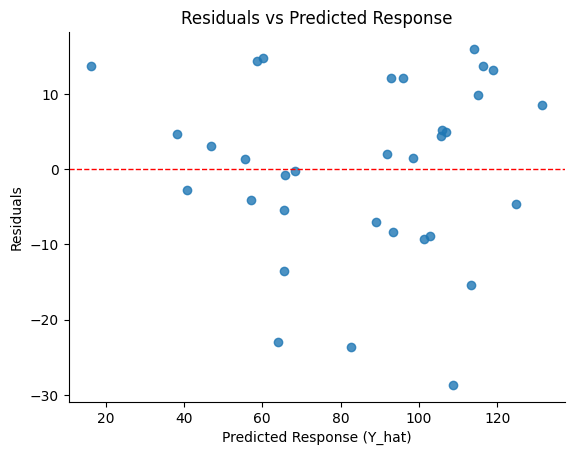

In [7]:
plt.scatter(Y_hat, residuals, alpha=0.8)
plt.axhline(y=0, color='red', linestyle = '--', linewidth=1)
plt.xlabel("Predicted Response (Y_hat)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Response")
plt.gca().spines[['top', 'right',]].set_visible(False)

The data points line randomly, indicating a good model and having a constant variance

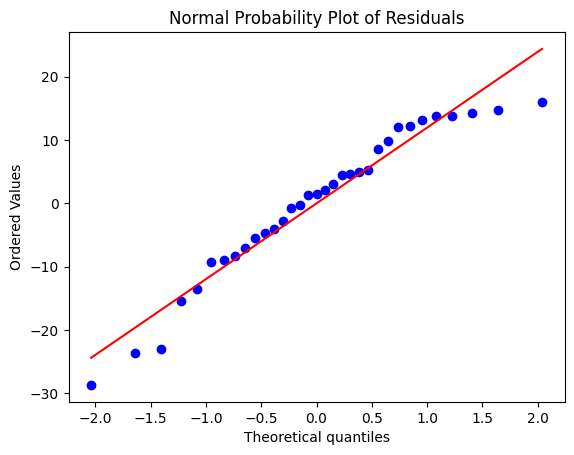

In [8]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Probability Plot of Residuals");

Generally, the residuals are independent and follow normal distribution, however, some negative residuals appear in the tails (bottom-left and top-right) shows a few extreme values, indicating potential outliers or slight non-normality (possible skewness or heavy-tailed residuals).

# c. What is added-variable plot? How is it used for? Prepare separate added-variable plots against e(X1|X2, X3), e(X2|X1, X3), and e(X3|X1, X2). Discuss.


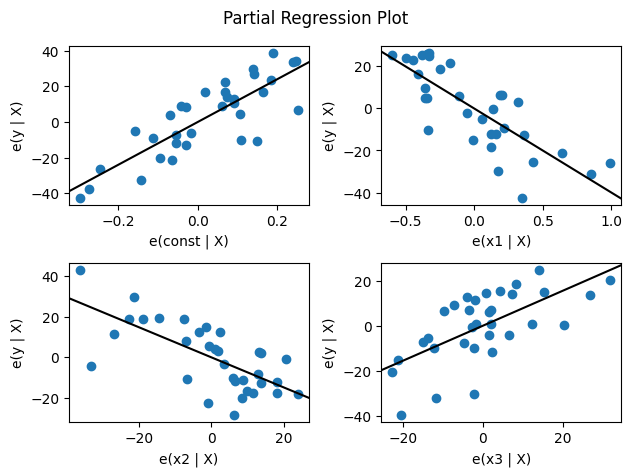

In [9]:

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

- An added-variable plot (also called a partial regression plot) is used to assess the relationship between a single predictor and the dependent variable after removing the effects of other predictors in a multiple regression model.  

- Purpose of Added-Variable Plots:  
    - Visualizing the Contribution of Each Predictor: Helps determine how much unique variance each predictor explains in Y after accounting for other predictors.  
    - Detecting Non-Linearity: If the plot shows a curved pattern, it suggests a non-linear relationship.  
    - Identifying Outliers & Influential Points: Extreme points in the plot may indicate high leverage or influential data points.  

- The plot show that both const, x1, x2, x3 play a significant role in the model